In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *

d:\Desktop\demir\diffae\env-diffae\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = 'cuda'
conf = real_us_training()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device)

Global seed set to 0


Model params: 91.89 M


BeatGANsAutoencModel(
  (time_embed): TimeStyleSeperateEmbed(
    (time_embed): Sequential(
      (0): Linear(in_features=64, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
    (style): Identity()
  )
  (input_blocks): ModuleList(
    (0): TimestepEmbedSequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): TimestepEmbedSequential(
      (0): ResBlock(
        (in_layers): Sequential(
          (0): GroupNorm32(32, 64, eps=1e-05, affine=True)
          (1): SiLU()
          (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (h_upd): Identity()
        (x_upd): Identity()
        (emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=128, bias=True)
        )
        (cond_emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=64, bias=True)
     

torch.Size([1, 128, 128])
torch.Size([1, 1, 128, 128])


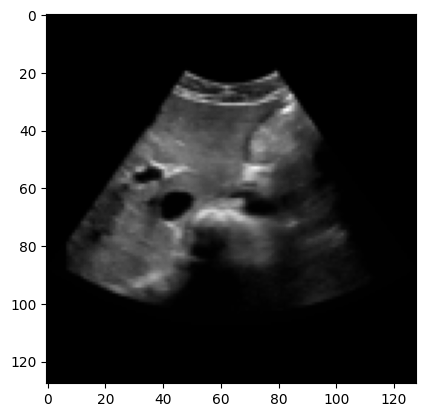

In [4]:
transform = transforms.Compose([transforms.Resize((conf.img_size, conf.img_size)), transforms.ToTensor()])
dataset = RealUSDataset(r'datasets\real_us')
idx = 1789
print(dataset[idx]['img'].shape)
import matplotlib.pyplot as plt
plt.imshow(dataset[idx]['img'][0], cmap='gray')

batch = dataset[idx]['img'][None]
print(batch.shape)

# Encode

In [5]:
cond = model.encode(batch.to(device))
xT = model.encode_stochastic(batch.to(device), cond, T=250)

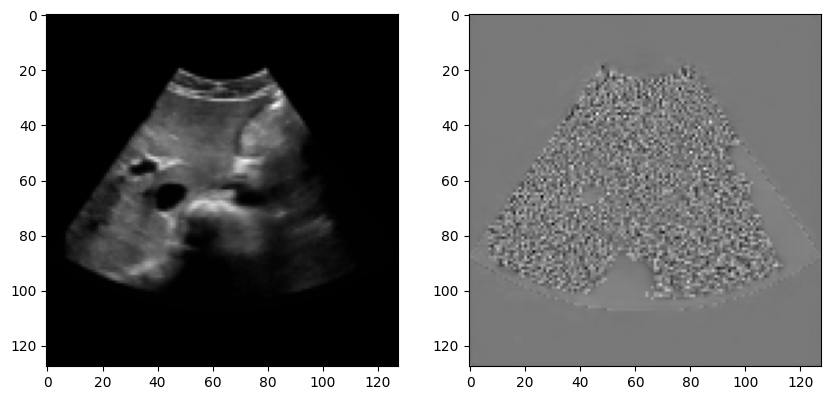

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ori = (batch + 1) / 2
ax[0].imshow(batch[0].permute(1, 2, 0).cpu(), cmap='gray')
ax[1].imshow(xT[0].permute(1, 2, 0).cpu(), cmap='gray')

# Decode

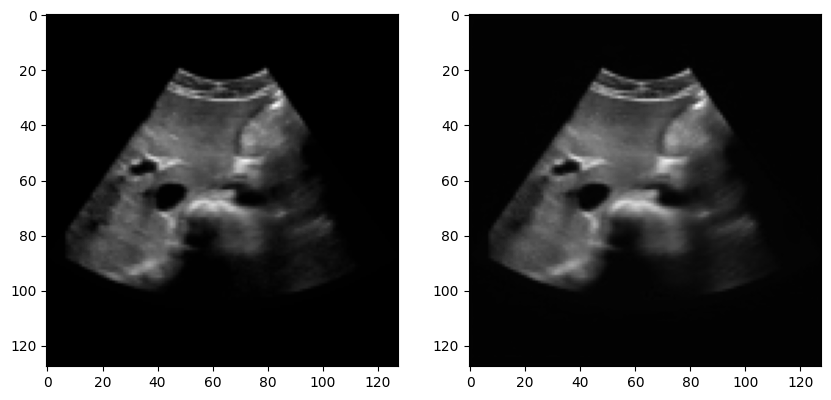

In [7]:
pred = model.render(xT, cond, T=20)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu(), cmap='gray')
ax[1].imshow(pred[0].permute(1, 2, 0).cpu(), cmap='gray')